# Green patents issuance correlation with extreme weather events

In [262]:
# %pip install xlrd
# %pip isntall openpyxl

In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# DATA IMPORT

In [264]:
# NUmber of countries per dataset
# GDP cap = 266

# FDI_WB = 266

# cata = 218

# governement = 217

# climate awareness == 111

# patents_PCT = 102

# count (patience) = 76

In [265]:
#Import country (https://www.briq-institute.org/global-preferences/downloads)
count = pd.read_stata("country.dta")

#Import extreme weather event dataset (https://www.emdat.be/)
cata = pd.read_excel("elephant_emdat_custom.xlsx")

#Import Patents datasets from OECD (https://stats.oecd.org/ --> Science, Technology and Patents/Patents Statistics/Patents by technology/Patents in environment-related technologies"
# patent = pd.read_csv("PATS_IPC_25102023222244840.csv")
patents_PCT = pd.read_csv("applications PCT.csv")

In [266]:
#Import GDP per Cap World data bank
GDPCap =  pd.read_excel("GDPperCAP_WB.xls", header = 3)

In [267]:
#FDI from WB 266 coountries
FDI_WB = pd.read_csv("API_BX.KLT.DINV.CD.WD_DS2_en_csv_v2_5995288.csv", header = 2)

In [268]:
#import climate worriness dataset (https://dataforgood.facebook.com/dfg/tools/climate-change-opinion-survey)
climate_awareness = pd.read_excel("climate_change_opinion_survey_2022_aggregated.xlsx",sheet_name = "climate_worry")

In [269]:
#human development index
HDI =  pd.read_excel("HDR21-22_Statistical_Annex_HDI_Table.xlsx")

In [270]:
#import governement information
government = pd.read_csv("dd492d4b-981b-41c4-9e4a-5ea2e92d4ed4_Data.csv")

# DATA CLEANING

## Patience


In [271]:
#see what in the patience dataset
count.columns
count['country'] = count['country'].str.lower()
count.rename(columns={'country':'Country'}, inplace=True)

In [272]:
count = count[['Country','patience','risktaking']]

In [273]:
len(count['Country'].unique())

76

# Patents

In [274]:
patents_PCT['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Türkiye',
       'United Kingdom', 'United States', 'Algeria', 'Andorra',
       'Argentina', 'Armenia', 'Belarus', 'Bermuda',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cayman Islands',
       'Chile', "China (People's Republic of)", 'Colombia', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus',
       "Democratic People's Republic of Korea", 'Djibouti', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Georgia', 'Guatemala',
       'Hong Kong, China', 'India', 'Indonesia', 'Iran', 'Israel',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia',
       'Lebanon', 'Liechtenstein', 'Lithuania', 'North Macedonia',
    

In [275]:
#first check for patent
patents_PCT.describe()

,TIME,Time,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,19750.000000,19750.000000,19750.0,0.0,0.0,19750.000000,0.0,0.0
mean,2010.148911,2010.148911,0.0,NaN,NaN,249.173886,NaN,NaN
std,6.664630,6.664630,0.0,NaN,NaN,2421.486606,NaN,NaN
min,1999.000000,1999.000000,0.0,NaN,NaN,0.000000,NaN,NaN
25%,2004.000000,2004.000000,0.0,NaN,NaN,0.000000,NaN,NaN
50%,2010.000000,2010.000000,0.0,NaN,NaN,1.000000,NaN,NaN
75%,2016.000000,2016.000000,0.0,NaN,NaN,15.000000,NaN,NaN
max,2021.000000,2021.000000,0.0,NaN,NaN,63766.802400,NaN,NaN


In [276]:
patents_PCT

,KINDPATENT,Patents Office & Patents Families,KINDCOUNTRY,Reference country,LOCATION,Country,IPC,Technology domains & IPC,KINDDATE,Reference Date,...,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,PCT_A,Patent applications filed under the PCT,APPLICANTS,Applicant(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,APPLICATION,Application date,...,1999,NBR,Number,0,Units,NaN,NaN,1072.6167,NaN,NaN
1,PCT_A,Patent applications filed under the PCT,APPLICANTS,Applicant(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,APPLICATION,Application date,...,2000,NBR,Number,0,Units,NaN,NaN,1511.8500,NaN,NaN
2,PCT_A,Patent applications filed under the PCT,APPLICANTS,Applicant(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,APPLICATION,Application date,...,2001,NBR,Number,0,Units,NaN,NaN,1588.5951,NaN,NaN
3,PCT_A,Patent applications filed under the PCT,APPLICANTS,Applicant(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,APPLICATION,Application date,...,2002,NBR,Number,0,Units,NaN,NaN,1660.8345,NaN,NaN
4,PCT_A,Patent applications filed under the PCT,APPLICANTS,Applicant(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,APPLICATION,Application date,...,2003,NBR,Number,0,Units,NaN,NaN,1600.2333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19745,PCT_A,Patent applications filed under the PCT,APPLICANTS,Applicant(s)'s country(ies) of residence,ZWE,Zimbabwe,WAT_WASTE,Climate change mitigation technologies related...,APPLICATION,Application date,...,2017,NBR,Number,0,Units,NaN,NaN,0.0000,NaN,NaN
19746,PCT_A,Patent applications filed under the PCT,APPLICANTS,Applicant(s)'s country(ies) of residence,ZWE,Zimbabwe,WAT_WASTE,Climate change mitigation technologies related...,APPLICATION,Application date,...,2018,NBR,Number,0,Units,NaN,NaN,0.0000,NaN,NaN
19747,PCT_A,Patent applications filed under the PCT,APPLICANTS,Applicant(s)'s country(ies) of residence,ZWE,Zimbabwe,WAT_WASTE,Climate change mitigation technologies related...,APPLICATION,Application date,...,2019,NBR,Number,0,Units,NaN,NaN,0.0000,NaN,NaN
19748,PCT_A,Patent applications filed under the PCT,APPLICANTS,Applicant(s)'s country(ies) of residence,ZWE,Zimbabwe,WAT_WASTE,Climate change mitigation technologies related...,APPLICATION,Application date,...,2020,NBR,Number,0,Units,NaN,NaN,0.0000,NaN,NaN


In [277]:
patents = patents_PCT[["Country", "Value", "Time","Technology domains & IPC"]].rename(columns={"Value":"patents_number"})
patents = patents[patents['Technology domains & IPC'] == "Total Patents"]

patents = patents.drop('Technology domains & IPC',axis=1)

# Convert 'country' column to lowercase
patents['Country'] = patents['Country'].str.lower().astype('string')
patents


,Country,patents_number,Time
0,australia,1072.6167,1999
1,australia,1511.8500,2000
2,australia,1588.5951,2001
3,australia,1660.8345,2002
4,australia,1600.2333,2003
...,...,...,...
2316,former yugoslavia,0.0000,2020
2317,former yugoslavia,0.0000,2021
18534,"briics economies - brazil, russia, india, indo...",0.0000,2019
18535,"briics economies - brazil, russia, india, indo...",0.0000,2020


In [278]:
patents[patents['patents_number'] == 0]

,Country,patents_number,Time
690,algeria,0.0,1999
1080,democratic people's republic of korea,0.0,1999
1081,democratic people's republic of korea,0.0,2000
1082,democratic people's republic of korea,0.0,2001
1102,djibouti,0.0,1999
...,...,...,...
2316,former yugoslavia,0.0,2020
2317,former yugoslavia,0.0,2021
18534,"briics economies - brazil, russia, india, indo...",0.0,2019
18535,"briics economies - brazil, russia, india, indo...",0.0,2020


In [279]:
countries_with_zero_patents = patents.groupby('Country')['patents_number'].sum() == 0

# Extract the countries with zero patents for every year
countries_with_zero_patents = countries_with_zero_patents[countries_with_zero_patents].index.tolist()

print("Countries with always 0 patents: ", countries_with_zero_patents)

Countries with always 0 patents:  ['briics economies - brazil, russia, india, indonesia, china and south africa', 'djibouti']


In [280]:
# remove countries having always 0 patents
patents = patents[~patents['Country'].isin(countries_with_zero_patents)]
patents.reset_index(drop=True, inplace=True)

In [281]:
patents

,Country,patents_number,Time
0,australia,1072.6167,1999
1,australia,1511.8500,2000
2,australia,1588.5951,2001
3,australia,1660.8345,2002
4,australia,1600.2333,2003
...,...,...,...
2290,former yugoslavia,0.0000,2017
2291,former yugoslavia,0.0000,2018
2292,former yugoslavia,0.0000,2019
2293,former yugoslavia,0.0000,2020


In [282]:
len(patents['Country'].unique())

100

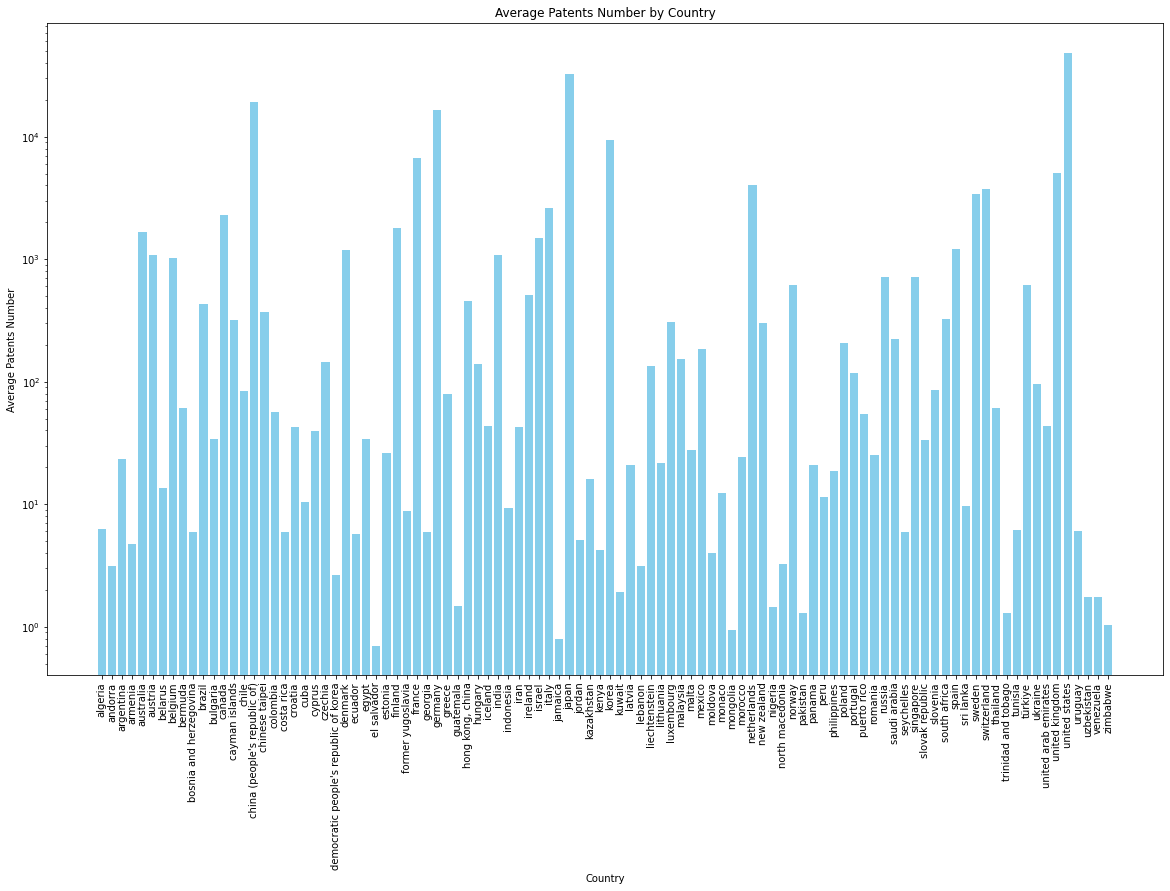

In [283]:
avg_patents_by_country = patents.groupby('Country')['patents_number'].mean().reset_index().dropna()

# Increase the figure size
plt.figure(figsize=(20, 12))

# Plot bar chart
plt.bar(avg_patents_by_country['Country'], avg_patents_by_country['patents_number'], color='skyblue')

plt.yscale('log')
# Set x-axis labels rotation
plt.xticks(rotation=90)

plt.title('Average Patents Number by Country')
plt.xlabel('Country')
plt.ylabel('Average Patents Number')
plt.show()

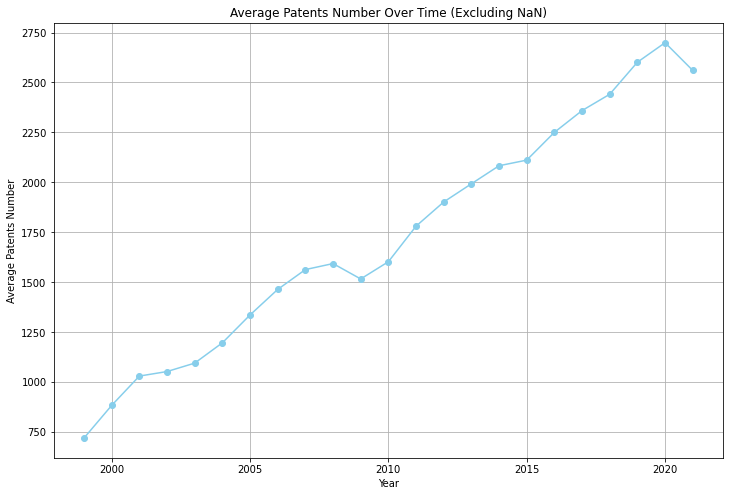

In [284]:
avg_patents_by_year =patents.groupby('Time')['patents_number'].mean().reset_index().dropna()

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot line chart
plt.plot(avg_patents_by_year['Time'], avg_patents_by_year['patents_number'], marker='o', linestyle='-', color='skyblue')

plt.title('Average Patents Number Over Time (Excluding NaN)')
plt.xlabel('Year')
plt.ylabel('Average Patents Number')
plt.grid(True)  # Add grid for better readability
plt.show()

In [285]:
patents.describe()

,patents_number,Time
count,2295.000000,2295.000000
mean,1730.342200,2009.977342
std,6869.283461,6.624004
min,0.000000,1999.000000
25%,5.208350,2004.000000
50%,37.000000,2010.000000
75%,481.368650,2016.000000
max,63766.802400,2021.000000


In [286]:
import numpy as np

def Sn_scale(data):
    n = len(data)
    distances = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distances[i, j] = np.abs(data[i] - data[j])

    medians = np.median(distances, axis=1)
    Sn = 1.1926 * np.median(medians)

    return Sn

In [287]:

Sn_estimate = Sn_scale(patents['patents_number'])
print(f"Sn Scale Estimate: {Sn_estimate}")

Sn Scale Estimate: 44.126200000000004


In [288]:
from statsmodels.robust.scale import mad

mad_estimate = 1.4826 * mad(patents['patents_number'])
print(f"MAD Estimate: {mad_estimate}")

MAD Estimate: 79.13181776963059


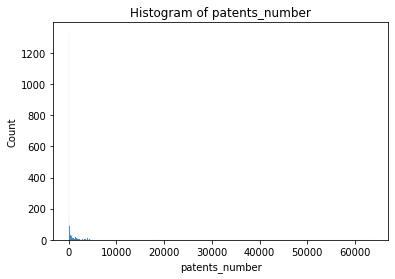

In [289]:
sns.histplot(x=patents['patents_number'])
plt.title('Histogram of patents_number')
plt.show()

c:\Users\giamm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


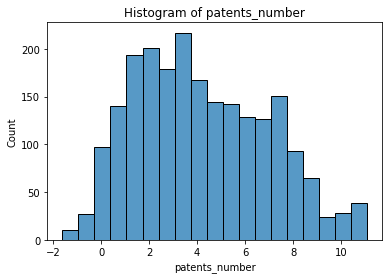

In [290]:
#trying cube root to handle skeweness
sns.histplot(x=np.log(patents['patents_number']))
plt.title('Histogram of patents_number')
plt.show()

In [291]:
patents_crop=patents[patents['patents_number']<12000]

In [292]:
patents_crop.describe()

,patents_number,Time
count,2211.000000,2211.000000
mean,558.126359,2009.900950
std,1340.073047,6.625855
min,0.000000,1999.000000
25%,5.000000,2004.000000
50%,33.214300,2010.000000
75%,341.401150,2016.000000
max,11765.009500,2021.000000


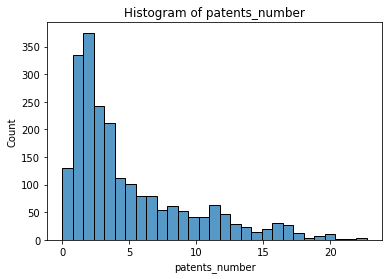

In [293]:
#trying cube root to handle skeweness
sns.histplot(x=np.cbrt(patents_crop['patents_number']))
plt.title('Histogram of patents_number')
plt.show()

In [294]:
patents[patents['patents_number'] > 6000]

,Country,patents_number,Time
168,france,6178.8000,2006
169,france,6523.9321,2007
170,france,6957.5298,2008
171,france,7157.8369,2009
172,france,7288.5611,2010
...,...,...,...
960,china (people's republic of),44122.8599,2017
961,china (people's republic of),47536.0361,2018
962,china (people's republic of),53512.1393,2019
963,china (people's republic of),63766.8024,2020


c:\Users\giamm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


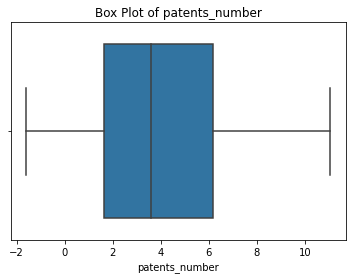

In [295]:
sns.boxplot(x=np.log(patents['patents_number']))
plt.title('Box Plot of patents_number')
# plt.xscale('log')
plt.show()

# Catastrophy

In [296]:
#let's play with the catastrophy dataset
cata.describe()

,AID Contribution ('000 US$),Magnitude,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,...,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
count,4.810000e+02,3.315000e+03,1804.000000,1804.000000,9781.000000,9712.000000,8356.000000,9781.000000,9622.000000,8418.000000,...,6.386000e+03,1.205000e+03,7.876000e+03,3.000000e+01,2.700000e+01,6.880000e+02,6.810000e+02,3.025000e+03,2.983000e+03,9504.000000
mean,2.894168e+04,4.910028e+04,16.436270,41.770847,2010.939679,6.387150,15.150072,2010.989163,6.581376,15.870634,...,7.013751e+05,3.384869e+04,5.747689e+05,6.149345e+06,3.245456e+06,1.299015e+06,1.632017e+06,1.101577e+06,1.385305e+06,75.598285
std,2.136265e+05,2.798597e+05,21.799873,75.570844,7.035249,3.382679,9.043017,7.036850,3.346649,8.913669,...,7.182814e+06,2.246830e+05,6.475121e+06,1.826331e+07,5.030913e+06,4.603440e+06,5.769464e+06,6.290534e+06,8.085126e+06,11.036263
min,3.000000e+00,-5.700000e+01,-72.640000,-172.095000,2000.000000,1.000000,1.000000,2000.000000,1.000000,1.000000,...,1.000000e+00,3.000000e+00,1.000000e+00,8.400000e+01,1.260000e+02,3.400000e+01,4.600000e+01,0.000000e+00,0.000000e+00,58.840648
25%,1.610000e+02,7.700000e+00,1.061500,-0.315000,2005.000000,4.000000,7.000000,2005.000000,4.000000,8.000000,...,1.071750e+03,3.500000e+02,6.000000e+02,1.068870e+05,1.391450e+05,7.225000e+04,9.394800e+04,1.500000e+04,2.033900e+04,66.731058
50%,7.610000e+02,1.990000e+02,18.550000,53.950500,2010.000000,7.000000,15.000000,2011.000000,7.000000,16.000000,...,9.412000e+03,1.995000e+03,5.046000e+03,5.515000e+05,6.745680e+05,2.460000e+05,3.305590e+05,1.000000e+05,1.306550e+05,74.509444
75%,5.018000e+03,2.173700e+04,34.786750,103.012750,2017.000000,9.000000,23.000000,2017.000000,9.000000,24.000000,...,7.545450e+04,8.000000e+03,5.000000e+04,4.736000e+06,3.106949e+06,8.000000e+05,1.040832e+06,5.000000e+05,6.710560e+05,83.757255
max,3.518530e+06,1.302587e+07,67.930000,179.650000,2023.000000,12.000000,31.000000,2023.000000,12.000000,31.000000,...,3.300000e+08,5.000000e+06,3.300000e+08,1.000000e+08,1.543428e+07,6.000000e+07,8.991316e+07,2.100000e+08,2.732184e+08,100.000000


In [297]:
cata.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [298]:
#Select only the needed columns
# cata['Duration in days'] = cata['End Day'] - cata['Start Day'] # needs to convert d/m/y and substract to work 

catastrophy = cata[["Country", "Disaster Type", 'Start Year','Total Deaths',"Total Affected", "Total Damage, Adjusted ('000 US$)"]]
catastrophy.head(20)

,Country,Disaster Type,Start Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,Djibouti,Drought,2001,NaN,100000.0,NaN
1,Sudan,Drought,2000,NaN,2000000.0,NaN
2,Somalia,Drought,2000,21.0,1200000.0,NaN
3,Angola,Flood,2000,31.0,70000.0,16995.0
4,Bangladesh,Extreme temperature,2000,49.0,NaN,NaN
5,Guatemala,Volcanic activity,2000,NaN,800.0,NaN
6,Iran (Islamic Republic of),Storm,2000,3.0,5500.0,NaN
7,Mozambique,Flood,2000,800.0,4500000.0,712433.0
8,South Africa,Wildfire,2000,NaN,1250.0,16995.0
9,Brazil,Flood,2000,26.0,70000.0,NaN


In [299]:
# drop line empty to focus only on extreme events
# catastrophy_complete1 = catastrophy.dropna(subset=["Total Damage, Adjusted ('000 US$)"])
# catastrophy_complete2 = catastrophy_complete1.dropna(subset=['Total Deaths'])
# print(catastrophy_complete2)


catastrophy["Total Affected"].isna().sum()


1905

In [300]:
#to get rid of the 2021 and 2022 years to merge with patent
# Cata20 = catastrophy_complete2[(catastrophy_complete2['Start Year'] != 2021) & (catastrophy_complete2['Start Year'] != 2022)]
# Cata20['Start Year'].unique()

In [301]:
#control all the value in Disaster Type
unique_disaster_types = catastrophy['Disaster Type'].unique()
print(unique_disaster_types)

['Drought' 'Flood' 'Extreme temperature' 'Volcanic activity' 'Storm'
 'Wildfire' 'Earthquake' 'Epidemic' 'Mass movement (wet)' 'Infestation'
 'Mass movement (dry)' 'Impact' 'Animal incident'
 'Glacial lake outburst flood']


In [302]:
#keep only the value that we want to study in the data set
cata_keep = ['Drought','Flood','Extreme temperature','Volcanic activity','Storm',
 'Wildfire','Earthquake' ,'Epidemic' ,'Mass movement (wet)', 'Infestation'
 ,'Mass movement (dry)' 'Impact' ,'Animal incident',
 'Glacial lake outburst flood']
# cata_keep = ['Drought', 'Flood', 'Storm','Extreme temperature', 'Earthquake','Volcanic activity']

#cata_keep = [x.lower() for x in cata_keep]

catastrophy_complete_filt = catastrophy[catastrophy['Disaster Type'].isin(cata_keep)]
catastrophy['Disaster Type'] = catastrophy['Disaster Type'].str.lower()
#catastrophy_complete_filt = Cata20[catastrophy_complete2['Disaster Type'].isin(cata_keep)]

catastrophy_complete_filt['Disaster Type'].unique()
# catastrophy_complete_filt['Start Year'].unique()

#convert country in lower letters
catastrophy_complete_filt['Country'] = catastrophy_complete_filt['Country'].str.lower().astype("string")
catastrophy_complete_filt['Disaster Type'] = catastrophy_complete_filt['Disaster Type'].str.lower().astype("string")
catastrophy_complete_filt['Country'].unique()

catastrophy_complete_filt.rename(columns={'Start Year': 'Year'}, inplace=True)

catastrophy_complete_filt['Disaster Type'].unique()


C:\Users\giamm\AppData\Local\Temp\ipykernel_24032\388527459.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catastrophy['Disaster Type'] = catastrophy['Disaster Type'].str.lower()
C:\Users\giamm\AppData\Local\Temp\ipykernel_24032\388527459.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catastrophy_complete_filt['Country'] = catastrophy_complete_filt['Country'].str.lower().astype("string")
C:\Users\giamm\AppData\Local\Temp\ipykernel_24032\388527459.py:19: SettingWithCopyWarning: 
A value is trying

<StringArray>
[                    'drought',                       'flood',
         'extreme temperature',           'volcanic activity',
                       'storm',                    'wildfire',
                  'earthquake',                    'epidemic',
         'mass movement (wet)',                 'infestation',
             'animal incident', 'glacial lake outburst flood']
Length: 12, dtype: string

In [303]:
# #control if the remaining value are only the one we need
# unique_disaster_types2 = catastrophy_complete_filt['Disaster Type'].unique()
# print(unique_disaster_types2)

In [304]:
#let's have a look to what is behind the new data
catastrophy_complete_filt.describe()

,Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
count,9767.000000,6944.000000,7.869000e+03,2.981000e+03
mean,2010.941743,220.847206,5.752414e+05,1.386217e+06
std,7.037274,4165.429928,6.477981e+06,8.087762e+06
min,2000.000000,1.000000,1.000000e+00,0.000000e+00
25%,2005.000000,4.000000,6.000000e+02,2.035400e+04
50%,2010.000000,12.000000,5.050000e+03,1.313320e+05
75%,2017.000000,34.000000,5.000000e+04,6.710560e+05
max,2023.000000,222570.000000,3.300000e+08,2.732184e+08


In [305]:
catastrophy_complete_filt[catastrophy_complete_filt['Total Affected'] > 6.710560e+05]

,Country,Disaster Type,Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
1,sudan,drought,2000,NaN,2000000.0,NaN
2,somalia,drought,2000,21.0,1200000.0,NaN
7,mozambique,flood,2000,800.0,4500000.0,712433.0
15,china,earthquake,2000,7.0,1855007.0,124914.0
56,madagascar,storm,2000,130.0,736937.0,15296.0
...,...,...,...,...,...,...
9749,morocco,earthquake,2023,2497.0,1002476.0,NaN
9755,libya,storm,2023,12352.0,1600000.0,NaN
9769,mexico,storm,2023,104.0,1369220.0,NaN
9777,somalia,flood,2023,32.0,1240000.0,NaN


c:\Users\giamm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


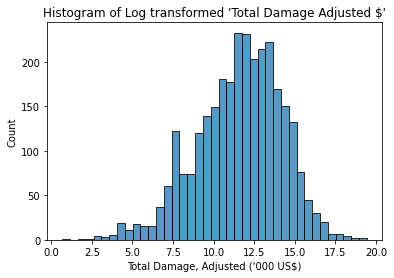

In [306]:
sns.histplot(x=np.log(catastrophy_complete_filt['Total Damage, Adjusted (\'000 US$)']))
plt.title('Histogram of Log transformed \'Total Damage Adjusted $\'')
plt.show()

In [307]:
#let's have only the value above the median because the distirbution is skwed when comparing mean and median
#we check the number of country above the median
#we take above the median to only have extreme events

cata_above_mediane = catastrophy_complete_filt[catastrophy_complete_filt['Total Deaths'] > catastrophy_complete_filt['Total Deaths'].median()]

#print(f"Nombre de valeurs au-dessus de la moyenne : {count_above_mean}")
print(cata_above_mediane["Country"].unique())

cata_above_mediane.head(30)


<StringArray>
[     'somalia',       'angola',   'bangladesh',   'mozambique',
       'brazil',        'india',      'romania',  'philippines',
 'south africa',        'congo',
 ...
      'albania',       'cyprus',      'denmark',      'estonia',
      'finland',      'ireland',        'malta',   'montenegro',
       'norway',       'sweden']
Length: 169, dtype: string


,Country,Disaster Type,Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
2,somalia,drought,2000,21.0,1200000.0,NaN
3,angola,flood,2000,31.0,70000.0,16995.0
4,bangladesh,extreme temperature,2000,49.0,NaN,NaN
7,mozambique,flood,2000,800.0,4500000.0,712433.0
9,brazil,flood,2000,26.0,70000.0,NaN
10,india,extreme temperature,2000,275.0,NaN,NaN
13,romania,storm,2000,14.0,300.0,NaN
18,philippines,flood,2000,50.0,153885.0,6934.0
20,south africa,flood,2000,83.0,200.0,271921.0
25,congo,epidemic,2000,24.0,NaN,NaN


## Play with the data not useful for merging

In [308]:
# #tester de grouper par pays
# grouped_pays = catastrophy_complete_filt.groupby('Country', as_index=False).sum()
# grouped_pays.head(30)

In [309]:
# catastrophy_complete_filt.dtypes

In [310]:
# #test with a bar plot how distirbuted it is regarding the death rate
# plt.figure(figsize=(20, 6))
# sns.barplot(x=grouped_pays.index, y='Total Deaths', data=grouped_pays)

# plt.xlabel('')
# plt.ylabel('Total Deaths')
# plt.title('Bar Plot for Total Deaths')
# plt.xticks(rotation=90)

# plt.show()

In [311]:
# catastrophy_complete_filt['Start Year'] = catastrophy_complete_filt['Start Year'].astype('int')

In [312]:
# catastrophy_complete_filt.dtypes

In [313]:
# #test regarding the years
# grouped_years = catastrophy_complete_filt.groupby('Start Year', as_index=False).sum()
# grouped_years.head(30)

In [314]:
# grouped_years.columns

In [315]:
# #test with a bar plot how distirbuted it is regarding the years
# plt.figure(figsize=(20, 6))
# sns.barplot(x=grouped_years['Start Year'], y='Total Deaths', data=grouped_years)

# plt.xlabel('Start Year')
# plt.ylabel('Total Deaths')
# plt.title('Bar Plot for Start Year')

# plt.show()

# #Graphe analysis
# #In 2004, one of the deadliest natural disasters in recorded history occurred: the Indian Ocean tsunami on December 26. Triggered by a massive undersea earthquake off the coast of Sumatra, Indonesia, the tsunami resulted in the loss of approximately 230,000 to 280,000 lives across several countries in the Indian Ocean region.

# #In 2008, there were several significant natural disasters that caused substantial damage, but in terms of high casualties, one of the notable events was the Sichuan earthquake in China on May 12. This earthquake, with a magnitude of 7.9, resulted in around 87,000 casualties, with many more injured and millions displaced.

# #In 2010, one of the major catastrophes was the Haiti earthquake on January 12. The earthquake, with a magnitude of 7.0, devastated the capital city of Port-au-Prince and surrounding areas, causing widespread destruction and leading to an estimated 230,000 deaths.


In [316]:
#let's now check the impact on only major events influenced by human
cata_human = ['Drought', 'Flood', 'Storm']

# cata_human = [x.lower() for x in cata_human]

catastrophy_human_filt = catastrophy_complete_filt[catastrophy_complete_filt['Disaster Type'].isin(cata_human)]

catastrophy_human_filt.head(20)
#catastrophy_human_filt['Start Year'].unique()

,Country,Disaster Type,Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"


In [317]:
#Again let's groupby countries
grouped_payshuman = catastrophy_human_filt.groupby('Country', as_index=False).sum()
grouped_payshuman.head(30)

,Country,Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"


In [318]:
# #test with a bar plot how distirbuted it is regarding the death rate
# plt.figure(figsize=(20, 6))
# sns.barplot(x=grouped_payshuman.index, y='Total Deaths', data=grouped_payshuman)

# plt.xlabel('')
# plt.ylabel('Total Deaths')
# plt.title('Bar Plot for Total Deaths')
# plt.xticks(rotation=90)

# plt.show()

In [319]:
# #test regarding the years
# grouped_yearshuman = catastrophy_human_filt.groupby('Start Year', as_index=False).sum()
# grouped_yearshuman.head(30)

In [320]:
# #test with a bar plot how distirbuted it is regarding the years
# plt.figure(figsize=(20, 6))
# sns.barplot(x=grouped_yearshuman['Start Year'], y='Total Deaths', data=grouped_yearshuman)

# plt.xlabel('Start Year')
# plt.ylabel('Total Deaths')
# plt.title('Bar Plot for Start Year')

# #interpretation
# #In 2008, Myanmar (formerly known as Burma) experienced a devastating natural disaster known as Cyclone Nargis. On May 2nd and 3rd, Cyclone Nargis made landfall in the Irrawaddy Delta region, which is a densely populated area in Myanmar. The cyclone brought extremely powerful winds, heavy rainfall, and a storm surge that inundated low-lying areas.
# #Cyclone Nargis caused widespread destruction, resulting in significant loss of life and devastating infrastructure damage. The official death toll reported by the Myanmar government was around 138,000 people, with many more missing or displaced. However, independent assessments suggested that the actual death toll might have been significantly higher.

# GDP_WB

In [321]:
#Cleaning GDP WB
GDPCap =  GDPCap.drop(['Country Code',"Indicator Name","Indicator Code"], axis=1)
GDPCap['Country Name'] = GDPCap['Country Name'].str.lower().astype("string")  

In [322]:
GDPCap

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
1,africa eastern and southern,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,210.149894,223.040659,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
2,afghanistan,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
3,africa western and central,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,143.601581,128.049650,129.123648,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
4,angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.562199,3902.529820,3520.780421,3759.471040,4009.356038,4384.190404,4416.031322,4310.932984,5269.783901,5351.439542
262,"yemen, rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385
263,south africa,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,813.508497,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.508112,6688.774746,5741.641249,7055.055176,6776.480077
264,zambia,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,398.557506,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.199836,1268.120941,956.831747,1137.344395,1487.907764


In [323]:
#only keeping the value after 2000 to 2020
# col_keep = list(range(0, 2)) + list(range(44, 65))

# GDPCap = GDPCap.iloc[:, col_keep]
# DGPCap.head(10)

selected_columns = [GDPCap.columns[0]] + [col for col in GDPCap.columns[1:] if int(col) > 1998]

GDP = GDPCap[selected_columns]
GDP

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,aruba,19833.826746,21023.157513,20913.299497,21377.095185,22050.830932,24104.646177,24975.673257,25833.445623,27665.426465,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
1,africa eastern and southern,671.862171,709.061010,630.198869,630.479082,816.437662,989.220845,1124.220303,1230.194793,1374.086248,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
2,afghanistan,NaN,NaN,NaN,183.532775,200.462376,221.657662,255.055107,274.000656,375.078261,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
3,africa western and central,526.248227,522.772772,535.897917,621.862505,700.443384,843.989814,1003.436618,1245.822948,1420.840336,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
4,angola,387.689415,556.884244,527.464118,872.657638,982.805590,1254.696126,1900.723817,2597.963585,3121.348735,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.562199,3902.529820,3520.780421,3759.471040,4009.356038,4384.190404,4416.031322,4310.932984,5269.783901,5351.439542
262,"yemen, rep.",421.821225,518.148673,515.139982,543.960981,583.391150,669.103362,785.451250,867.782937,956.230635,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385
263,south africa,3267.939079,3241.661240,2867.472552,2708.423419,4095.683610,5268.278984,5893.186767,6139.581467,6662.062785,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.508112,6688.774746,5741.641249,7055.055176,6776.480077
264,zambia,353.830209,364.026126,401.732316,399.099078,452.286578,556.050007,720.446505,1065.596417,1133.436158,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.199836,1268.120941,956.831747,1137.344395,1487.907764


In [324]:
# Data Restructuration
data = [['Country Name', 'Year', 'GDPCap']]

for index, row in GDP.iterrows():
    pays = row['Country Name']
    for col in GDP.columns[1:]:
        annee = int(col)
        valeur = row[col]
        data.append([pays, annee, valeur])

# Create new dataframe with data Restructuration
gdp = pd.DataFrame(data[1:], columns=data[0])

# reset index to columns
gdp.reset_index(drop=True, inplace=True)

# Check the modified dataframe
gdp.head()

,Country Name,Year,GDPCap
0,aruba,1999,19833.826746
1,aruba,2000,21023.157513
2,aruba,2001,20913.299497
3,aruba,2002,21377.095185
4,aruba,2003,22050.830932


In [325]:
# #Split country above and under the gdp mediane
# keep = DGPCap_clean[2010.0].index[DGPCap_clean[2010.0] >= DGPCap_clean[2010.0].median()]
# gdp_above = DGPCap_clean.loc[keep]
# gdp_above = gdp_above['Country Name'].str.lower().astype('object').unique()
# print(gdp_above)

# print ('''

# ''')

# keep = DGPCap_clean[2010.0].index[DGPCap_clean[2010.0] <= DGPCap_clean[2010.0].median()]
# gdp_below = DGPCap_clean.loc[keep]
# gdp_below = gdp_below['Country Name'].str.lower().astype('object').unique()
# print(gdp_below)

In [326]:
gdp.describe()

,Year,GDPCap
count,6384.000000,6105.000000
mean,2010.500000,14013.342275
std,6.922729,22215.784018
min,1999.000000,99.757251
25%,2004.750000,1483.951559
50%,2010.500000,4739.277808
75%,2016.250000,16874.187492
max,2022.000000,234317.084818


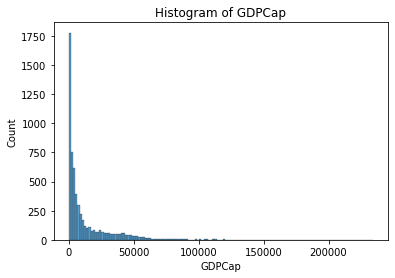

In [327]:
sns.histplot(gdp['GDPCap'])
plt.title('Histogram of GDPCap')
plt.show()

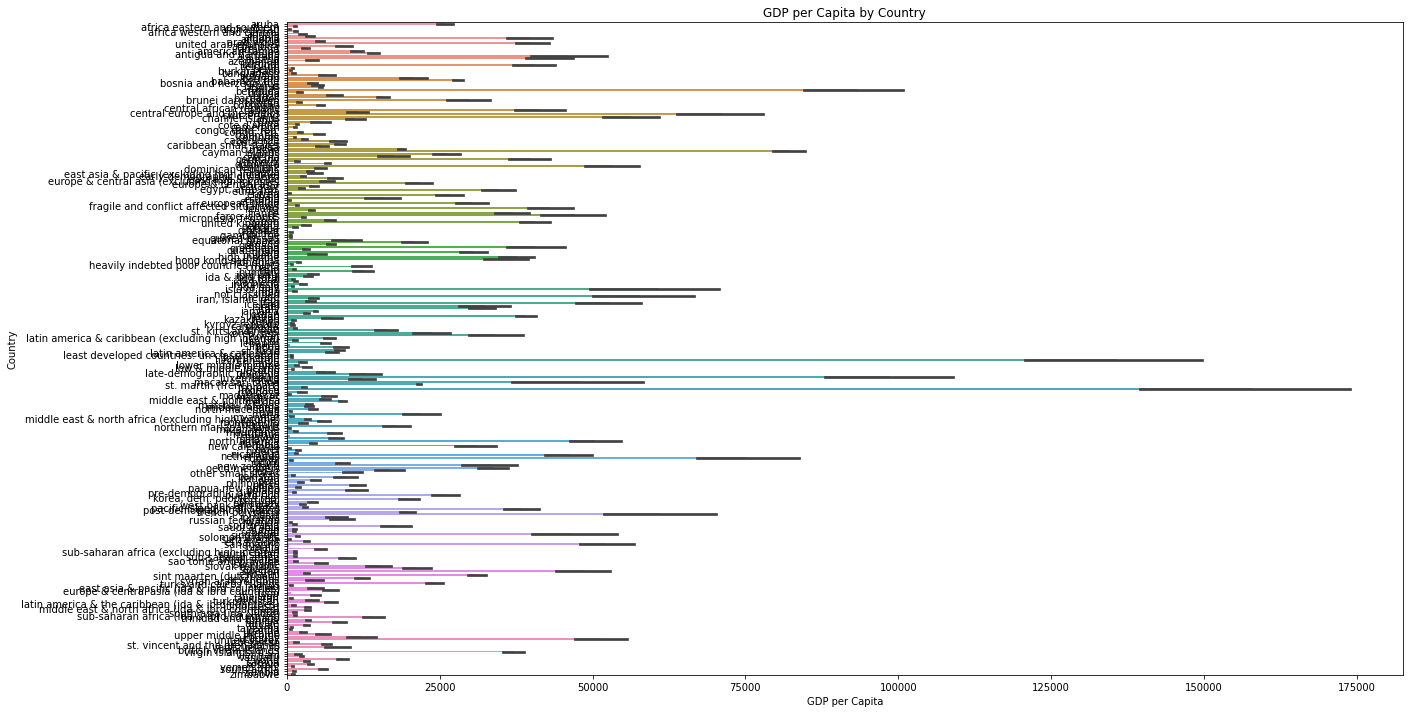

In [328]:
plt.figure(figsize=(20, 12))
sns.barplot(x='GDPCap', y='Country Name', data=gdp)
plt.title('GDP per Capita by Country')
plt.xlabel('GDP per Capita')
plt.ylabel('Country')
plt.show()

## Play with graphe and GDP

In [329]:
# #split country above and under the GDP mediane

# keep = DGPCap_clean[2022.0].index[DGPCap_clean[2022.0] >= DGPCap_clean[2022.0].median()]
# GDP_above = DGPCap_clean.loc[keep]
# GDP_above.head(20)

# #median = DGPCap_clean[2022.0].median()
# #print(median)

In [330]:
# #take out all the country above the median
# liste = GDP_above['Country Name'].unique()
# list_above = liste.tolist()
# Country_above_GDP = [x.lower() for x in list_above]
# Country_above_GDP

In [331]:
# #testing the death in country above GDP

# cata_count_above = grouped_payshuman[grouped_payshuman['Country'].isin(Country_above_GDP)]

# cata_count_above.head(20)

In [332]:
# #test with a bar plot how distirbuted it is regarding the death rate for country above GDP
# plt.figure(figsize=(20, 6))
# sns.barplot(x=cata_count_above['Country'], y="Total Damage, Adjusted ('000 US$)", data=cata_count_above)

# plt.xlabel('')
# plt.ylabel("Total Damage ('000 US$)")
# plt.title('Bar Plot for Total Deaths')
# plt.xticks(rotation=90)

# plt.show()

In [333]:
# #split country below and under the GDP mediane

# keep1 = DGPCap_clean[2022.0].index[DGPCap_clean[2022.0] <= DGPCap_clean[2022.0].median()]
# GDP_below = DGPCap_clean.loc[keep1]
# GDP_below.head(20)

In [334]:
# #take out all the country below the median
# liste1 = GDP_below['Country Name'].unique()
# list_below = liste1.tolist()
# Country_below_GDP = [x.lower() for x in list_below]
# Country_below_GDP

In [335]:
# #testing the death in country below GDP

# cata_count_below = grouped_payshuman[grouped_payshuman['Country'].isin(Country_below_GDP)]

# cata_count_below.head(20)

In [336]:
# #test with a bar plot how distirbuted it is regarding the death rate for country above GDP
# plt.figure(figsize=(20, 6))
# sns.barplot(x=cata_count_below['Country'], y="Total Damage, Adjusted ('000 US$)", data=cata_count_below)

# plt.xlabel('')
# plt.ylabel("Total Damage ('000 US$)")
# plt.title('Bar Plot for Total Deaths')
# plt.xticks(rotation=90)

# plt.show()

## Cleaning FDI dataset

In [337]:
# FDI_WB.head()

In [338]:
FDI_WB = FDI_WB.drop(["Country Code", "Indicator Name", "Indicator Code","Unnamed: 67"],axis=1)
FDI_WB['Country Name'] = FDI_WB["Country Name"].str.lower()
selected_columns = [FDI_WB.columns[0]] + [col for col in FDI_WB.columns[1:] if int(col) > 1998]

FDI = FDI_WB[selected_columns]
FDI

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,aruba,4.675419e+08,-1.279330e+08,-2.669274e+08,3.325140e+08,1.597765e+08,-1.056983e+08,-2.077980e+08,2.203161e+08,-4.710056e+08,...,2.263714e+08,2.506181e+08,-2.877586e+07,2.755127e+07,1.624636e+08,1.359212e+08,-7.522654e+07,1.610670e+08,1.335451e+08,2.481503e+08
1,africa eastern and southern,6.254804e+09,4.315007e+09,1.220501e+10,6.464122e+09,8.555149e+09,7.979692e+09,1.033388e+10,7.234543e+09,1.612228e+10,...,2.153425e+10,2.768142e+10,2.877423e+10,1.666027e+10,1.010829e+10,1.358898e+10,1.486866e+10,1.285669e+10,5.279721e+10,1.807836e+10
2,afghanistan,6.040000e+06,1.700000e+05,6.800000e+05,5.000000e+07,5.780000e+07,1.869000e+08,2.710000e+08,2.380000e+08,1.886900e+08,...,4.831135e+07,4.297526e+07,1.691466e+08,9.359132e+07,5.153390e+07,1.194351e+08,2.340455e+07,1.297015e+07,2.060098e+07,NaN
3,africa western and central,2.391058e+09,2.560095e+09,3.224339e+09,4.408519e+09,5.262167e+09,4.653749e+09,9.278129e+09,9.202357e+09,1.303066e+10,...,1.915755e+10,1.659803e+10,1.564317e+10,1.393704e+10,1.766242e+10,1.549284e+10,1.245274e+10,1.075330e+10,1.735395e+10,1.258155e+10
4,angola,2.471460e+09,8.786200e+08,2.145470e+09,1.743504e+09,3.576972e+09,2.197228e+09,-1.303837e+09,-3.771486e+07,-8.933422e+08,...,-7.120017e+09,3.657515e+09,1.002822e+10,-1.795176e+08,-7.397295e+09,-6.456076e+09,-4.098479e+09,-1.866468e+09,-4.355117e+09,-6.598653e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,kosovo,NaN,NaN,NaN,NaN,NaN,5.338531e+07,1.338768e+08,3.701372e+08,6.040219e+08,...,3.714922e+08,1.998884e+08,3.433506e+08,2.437871e+08,2.868352e+08,3.185430e+08,2.850816e+08,3.946253e+08,5.009279e+08,8.114684e+08
262,"yemen, rep.",-3.076000e+08,6.399510e+06,1.551410e+08,1.143020e+08,-8.910700e+07,1.435780e+08,-3.020567e+08,1.120970e+09,9.173000e+08,...,-1.335709e+08,-2.331047e+08,-1.544481e+07,-5.610000e+08,-2.698500e+08,-2.820983e+08,-3.709828e+08,NaN,NaN,NaN
263,south africa,1.503332e+09,9.688314e+08,7.270345e+09,1.479805e+09,7.831361e+08,7.014220e+08,6.522098e+09,6.232917e+08,6.586792e+09,...,8.232519e+09,5.791659e+09,1.521140e+09,2.215307e+09,2.058580e+09,5.569462e+09,5.116098e+09,3.153553e+09,4.065879e+10,9.194808e+09
264,zambia,1.620000e+08,1.217000e+08,1.450000e+08,2.983900e+08,3.470000e+08,3.640400e+08,3.569400e+08,6.157900e+08,1.323900e+09,...,2.099800e+09,1.507800e+09,1.582667e+09,6.628139e+08,1.107520e+09,4.084385e+08,5.479679e+08,2.452055e+08,-2.714361e+08,1.080941e+07


In [339]:
data = [['Country Name', 'Year', 'FDI']]

for index, row in FDI.iterrows():
    pays = row['Country Name']
    for col in FDI.columns[1:]:
        annee = int(col)
        valeur = row[col]
        data.append([pays, annee, valeur])

# Create new dataframe with data Restructuration
fdi = pd.DataFrame(data[1:], columns=data[0])

# reset index to columns
fdi.reset_index(drop=True, inplace=True)

# Check the modified dataframe
fdi.head()

,Country Name,Year,FDI
0,aruba,1999,4.675419e+08
1,aruba,2000,-1.279330e+08
2,aruba,2001,-2.669274e+08
3,aruba,2002,3.325140e+08
4,aruba,2003,1.597765e+08


In [340]:
fdi.describe()

,Year,FDI
count,6384.000000,5.846000e+03
mean,2010.500000,5.831206e+10
std,6.922729,2.184619e+11
min,1999.000000,-3.303385e+11
25%,2004.750000,1.348744e+08
50%,2010.500000,1.275820e+09
75%,2016.250000,1.531705e+10
max,2022.000000,3.133732e+12


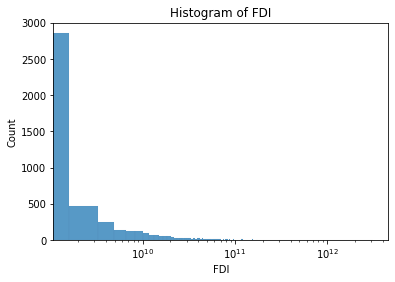

In [341]:
# sns.histplot(np.log(fdi['FDI']))
sns.histplot(fdi['FDI'])
plt.title('Histogram of FDI')
plt.xscale('log')
plt.show()

c:\Users\giamm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\giamm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


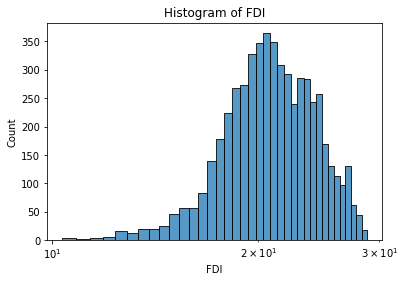

In [342]:
sns.histplot(np.log(fdi['FDI']))
plt.title('Histogram of FDI')
plt.xscale('log')
plt.show()

c:\Users\giamm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\giamm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


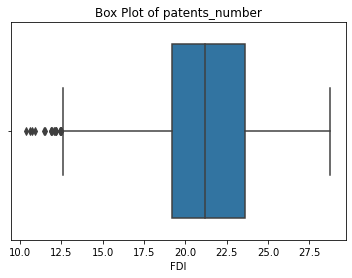

In [343]:
sns.boxplot(x=np.log(fdi['FDI']))
plt.title('Box Plot of patents_number')
plt.show()

## Cleaning Government dataset

In [344]:
# #import governement information
government = pd.read_csv("dd492d4b-981b-41c4-9e4a-5ea2e92d4ed4_Data.csv")

In [345]:
#removing unnecessary columns
government = government.drop(["Country Code", "Series Code"],axis=1)

# Rename the columns using  mapping
government.rename(columns={col: col.split()[0] for col in government.columns if '[YR' in col}, inplace=True)


In [346]:
reframed_government = pd.melt(
    government,
    id_vars=['Country Name', 'Series Name'],
    var_name='Year',
    value_name='Value'
)

In [347]:
reframed_government['Year'] = reframed_government['Year'].astype('int64')
reframed_government = reframed_government[reframed_government['Year'] > 1998]
reframed_government['Country Name'] = reframed_government['Country Name'].str.lower().astype('string')
# Replace non-numeric values ('..') with NaN in the 'Value' column
reframed_government['Value'] = pd.to_numeric(reframed_government['Value'], errors='coerce')
reframed_government['Value'] = reframed_government['Value'].astype('float64')

reframed_government = reframed_government.dropna(subset=['Country Name'])
reframed_government = reframed_government.iloc[:-2]

# Keep only rows where 'Series Name' contains 'Estimate'
reframed_government['Series Name'] = reframed_government['Series Name'].fillna('').astype('string')
reframed_government = reframed_government[reframed_government['Series Name'].str.contains('Estimate')]
reframed_government['Series Name'] = reframed_government['Series Name'].str.replace(': Estimate', '')
reframed_government.rename(columns={'Country Name': 'Country'}, inplace=True)


In [348]:
reframed_government

,Country,Series Name,Year,Value
10710,afghanistan,Control of Corruption,2000,-1.271724
10716,afghanistan,Government Effectiveness,2000,-2.173946
10722,afghanistan,Political Stability and Absence of Violence/Te...,2000,-2.438969
10728,afghanistan,Regulatory Quality,2000,-2.080253
10734,afghanistan,Rule of Law,2000,-1.780661
...,...,...,...,...
128490,zimbabwe,Control of Corruption,2022,-1.255139
128496,zimbabwe,Government Effectiveness,2022,-1.254613
128502,zimbabwe,Political Stability and Absence of Violence/Te...,2022,-0.884500
128508,zimbabwe,Regulatory Quality,2022,-1.425967


## Cleaning climate_awareness dataset

In [349]:
#import climate worriness dataset (https://dataforgood.facebook.com/dfg/tools/climate-change-opinion-survey)
climate_awareness = pd.read_excel("climate_change_opinion_survey_2022_aggregated.xlsx",sheet_name = "climate_worry")

In [350]:
climate_awareness = climate_awareness.transpose()
climate_awareness.columns = climate_awareness.iloc[0]
climate_awareness = climate_awareness.iloc[1:]

In [351]:
climate_awareness['Country'] = climate_awareness.index
climate_awareness['Country'] = climate_awareness['Country'].str.lower() 
climate_awareness['Worriness'] = climate_awareness['Very worried'] + climate_awareness['Somewhat worried']
climate_awareness.reset_index(drop= True, inplace=True)

In [352]:
climate_awareness = climate_awareness[['Country',"Worriness"]]  
climate_awareness.rename_axis('', axis=1, inplace=True)
# climate_awareness

In [353]:
climate_awareness

,Country,Worriness
0,albania,81.680117
1,algeria,65.927619
2,angola,74.165504
3,argentina,84.59469
4,armenia,72.705038
...,...,...
105,uruguay,85.160842
106,uzbekistan,78.558349
107,vietnam,85.194041
108,yemen,31.703961


# Merging all datasets

In [354]:
merged = pd.merge(gdp, fdi, on=['Country Name', 'Year'], how='inner')

In [355]:
# merged[merged['GDPCap'].isna()]['Country Name'].unique()
# merged[merged['GDPCap'].isna()]['Country Name'].count()
# merged.isna().sum()

merged[merged['GDPCap'].isna() & merged['FDI'].isna()]['Country Name'].count()

163

In [356]:
merged.rename(columns={'Country Name': 'Country'}, inplace=True)

In [357]:
catastrophy_complete_filt

,Country,Disaster Type,Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,djibouti,drought,2001,NaN,100000.0,NaN
1,sudan,drought,2000,NaN,2000000.0,NaN
2,somalia,drought,2000,21.0,1200000.0,NaN
3,angola,flood,2000,31.0,70000.0,16995.0
4,bangladesh,extreme temperature,2000,49.0,NaN,NaN
...,...,...,...,...,...,...
9776,honduras,storm,2023,4.0,46658.0,NaN
9777,somalia,flood,2023,32.0,1240000.0,NaN
9778,honduras,drought,2023,NaN,10300.0,NaN
9779,spain,drought,2023,NaN,NaN,NaN


In [358]:
merged_V2 = pd.merge(merged, catastrophy_complete_filt, on=['Country', 'Year'], how='outer')

In [359]:
merged_V2.dtypes

Country                               object
Year                                   int64
GDPCap                               float64
FDI                                  float64
Disaster Type                         string
Total Deaths                         float64
Total Affected                       float64
Total Damage, Adjusted ('000 US$)    float64
dtype: object

In [360]:
merged_V3 = pd.merge(merged_V2, reframed_government, on=['Country', 'Year'], how='left')
merged_V3.rename(columns={'Value': 'Gov_value'}, inplace=True)

In [361]:
merged_V3

,Country,Year,GDPCap,FDI,Disaster Type,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Series Name,Gov_value
0,aruba,1999,19833.826746,4.675419e+08,<NA>,NaN,NaN,NaN,<NA>,NaN
1,aruba,2000,21023.157513,-1.279330e+08,<NA>,NaN,NaN,NaN,Control of Corruption,NaN
2,aruba,2000,21023.157513,-1.279330e+08,<NA>,NaN,NaN,NaN,Government Effectiveness,NaN
3,aruba,2000,21023.157513,-1.279330e+08,<NA>,NaN,NaN,NaN,Political Stability and Absence of Violence/Te...,NaN
4,aruba,2000,21023.157513,-1.279330e+08,<NA>,NaN,NaN,NaN,Regulatory Quality,NaN
...,...,...,...,...,...,...,...,...,...,...
51982,mexico,2023,NaN,NaN,storm,104.0,1369220.0,NaN,<NA>,NaN
51983,solomon islands,2023,NaN,NaN,storm,NaN,22319.0,NaN,<NA>,NaN
51984,honduras,2023,NaN,NaN,storm,4.0,46658.0,NaN,<NA>,NaN
51985,honduras,2023,NaN,NaN,drought,NaN,10300.0,NaN,<NA>,NaN


In [362]:
merged_V4 = pd.merge(merged_V3,climate_awareness, on='Country', how='left')

In [363]:
patents.rename(columns={'Time':'Year'}, inplace=True)

C:\Users\giamm\AppData\Local\Temp\ipykernel_24032\542382635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patents.rename(columns={'Time':'Year'}, inplace=True)


In [364]:
merged_V5=pd.merge(merged_V4, patents, on=['Country','Year'], how='right')

In [365]:
merged_final = pd.merge(merged_V5, count,on='Country',how='left')

In [366]:
# merged_final = merged

In [367]:
merged_final = merged_final.dropna(subset=['Disaster Type'])

In [368]:
# count nan values per column
nan_count_per_column = merged_final.isna().sum()

# Display the count of NaN values in each column
print(nan_count_per_column)

Country                                  0
Year                                     0
GDPCap                                 163
FDI                                    399
Disaster Type                            0
Total Deaths                          5775
Total Affected                        4416
Total Damage, Adjusted ('000 US$)    13701
Series Name                            330
Gov_value                              330
Worriness                             1182
patents_number                           0
patience                              3197
risktaking                            3197
dtype: int64


In [369]:
merged_final

,Country,Year,GDPCap,FDI,Disaster Type,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Series Name,Gov_value,Worriness,patents_number,patience,risktaking
1,australia,2000,21853.449993,1.489298e+10,storm,1.0,200.0,152955.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137
2,australia,2000,21853.449993,1.489298e+10,storm,1.0,200.0,152955.0,Government Effectiveness,1.732170,72.991429,1511.8500,0.657004,0.137137
3,australia,2000,21853.449993,1.489298e+10,storm,1.0,200.0,152955.0,Political Stability and Absence of Violence/Te...,1.333965,72.991429,1511.8500,0.657004,0.137137
4,australia,2000,21853.449993,1.489298e+10,storm,1.0,200.0,152955.0,Regulatory Quality,1.575613,72.991429,1511.8500,0.657004,0.137137
5,australia,2000,21853.449993,1.489298e+10,storm,1.0,200.0,152955.0,Rule of Law,1.722067,72.991429,1511.8500,0.657004,0.137137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24416,zimbabwe,2021,1773.920411,2.500000e+08,drought,NaN,167500.0,NaN,Control of Corruption,-1.253550,NaN,0.3333,-0.238587,0.523195
24417,zimbabwe,2021,1773.920411,2.500000e+08,drought,NaN,167500.0,NaN,Government Effectiveness,-1.304817,NaN,0.3333,-0.238587,0.523195
24418,zimbabwe,2021,1773.920411,2.500000e+08,drought,NaN,167500.0,NaN,Political Stability and Absence of Violence/Te...,-0.954426,NaN,0.3333,-0.238587,0.523195
24419,zimbabwe,2021,1773.920411,2.500000e+08,drought,NaN,167500.0,NaN,Regulatory Quality,-1.386109,NaN,0.3333,-0.238587,0.523195


In [370]:
# remuving duplicates of GOV value 
merged_nodup = merged_final.drop_duplicates(subset=merged_final.columns[:8], keep='first')
merged_nodup

,Country,Year,GDPCap,FDI,Disaster Type,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Series Name,Gov_value,Worriness,patents_number,patience,risktaking
1,australia,2000,21853.449993,1.489298e+10,storm,1.0,200.0,152955.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137
6,australia,2000,21853.449993,1.489298e+10,storm,NaN,400.0,101970.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137
11,australia,2000,21853.449993,1.489298e+10,infestation,NaN,NaN,203941.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137
16,australia,2000,21853.449993,1.489298e+10,wildfire,NaN,200.0,NaN,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137
21,australia,2000,21853.449993,1.489298e+10,flood,NaN,600.0,450369.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24391,zimbabwe,2018,2269.177012,7.178653e+08,epidemic,12.0,5164.0,NaN,Control of Corruption,-1.246001,NaN,0.0000,-0.238587,0.523195
24396,zimbabwe,2019,1421.868596,2.495000e+08,flood,26.0,NaN,NaN,Control of Corruption,-1.271190,NaN,0.0000,-0.238587,0.523195
24401,zimbabwe,2019,1421.868596,2.495000e+08,storm,628.0,270186.0,NaN,Control of Corruption,-1.271190,NaN,0.0000,-0.238587,0.523195
24411,zimbabwe,2021,1773.920411,2.500000e+08,storm,3.0,2400.0,NaN,Control of Corruption,-1.253550,NaN,0.3333,-0.238587,0.523195


In [371]:
# create dummy variable to separate human-related events 
merged_nodup['dummy_event'] = merged_nodup['Disaster Type'].apply(lambda x: 0 if x in ['storm', 'flood', 'drought', 'extreme temperature', 'glacial lake outburst flood'] else 1)

C:\Users\giamm\AppData\Local\Temp\ipykernel_24032\1397378049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_nodup['dummy_event'] = merged_nodup['Disaster Type'].apply(lambda x: 0 if x in ['storm', 'flood', 'drought', 'extreme temperature', 'glacial lake outburst flood'] else 1)


In [372]:
merged_nodup

,Country,Year,GDPCap,FDI,Disaster Type,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Series Name,Gov_value,Worriness,patents_number,patience,risktaking,dummy_event
1,australia,2000,21853.449993,1.489298e+10,storm,1.0,200.0,152955.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137,0
6,australia,2000,21853.449993,1.489298e+10,storm,NaN,400.0,101970.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137,0
11,australia,2000,21853.449993,1.489298e+10,infestation,NaN,NaN,203941.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137,1
16,australia,2000,21853.449993,1.489298e+10,wildfire,NaN,200.0,NaN,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137,1
21,australia,2000,21853.449993,1.489298e+10,flood,NaN,600.0,450369.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24391,zimbabwe,2018,2269.177012,7.178653e+08,epidemic,12.0,5164.0,NaN,Control of Corruption,-1.246001,NaN,0.0000,-0.238587,0.523195,1
24396,zimbabwe,2019,1421.868596,2.495000e+08,flood,26.0,NaN,NaN,Control of Corruption,-1.271190,NaN,0.0000,-0.238587,0.523195,0
24401,zimbabwe,2019,1421.868596,2.495000e+08,storm,628.0,270186.0,NaN,Control of Corruption,-1.271190,NaN,0.0000,-0.238587,0.523195,0
24411,zimbabwe,2021,1773.920411,2.500000e+08,storm,3.0,2400.0,NaN,Control of Corruption,-1.253550,NaN,0.3333,-0.238587,0.523195,0


In [436]:
country_counts = merged_nodup['Country'].value_counts()

# Display the counts
country_counts.head(50)

india                                    374
indonesia                                344
philippines                              336
japan                                    157
mexico                                   150
pakistan                                 133
brazil                                   121
australia                                113
colombia                                 108
thailand                                 102
nigeria                                  101
france                                    98
peru                                      95
kenya                                     92
italy                                     86
türkiye                                   82
guatemala                                 79
argentina                                 75
south africa                              71
sri lanka                                 70
malaysia                                  68
canada                                    67
romania   

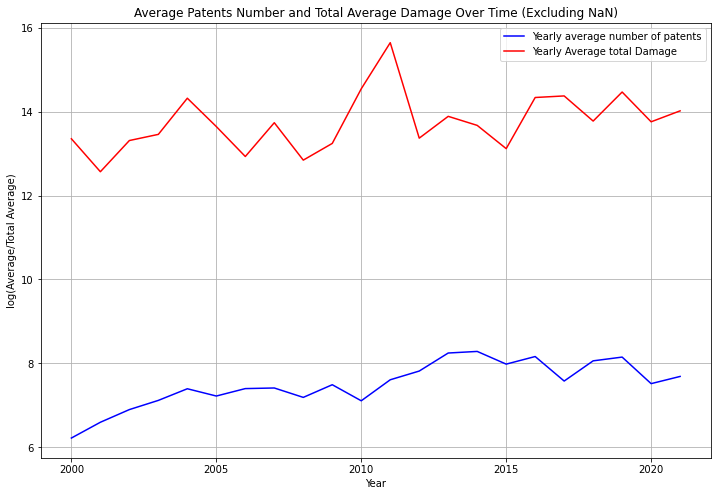

In [373]:

avg_patents_by_year = merged_nodup.groupby('Year')['patents_number'].mean().reset_index().dropna()
avg_damage_by_year = merged_nodup.groupby('Year')['Total Damage, Adjusted (\'000 US$)'].mean().reset_index().dropna()

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot line chart for average patents
plt.plot(avg_patents_by_year['Year'], np.log(avg_patents_by_year['patents_number']), linestyle='-', color='b', label='Yearly average number of patents')

# Plot line chart for average damage
plt.plot(avg_damage_by_year['Year'], np.log(avg_damage_by_year['Total Damage, Adjusted (\'000 US$)']), linestyle='-', color='r', label='Yearly Average total Damage')

plt.title('Average Patents Number and Total Average Damage Over Time (Excluding NaN)')
plt.xlabel('Year')
plt.ylabel('log(Average/Total Average)')
plt.legend()  # Add legend to differentiate between lines
plt.grid(True)  # Add grid for better readability
plt.show()

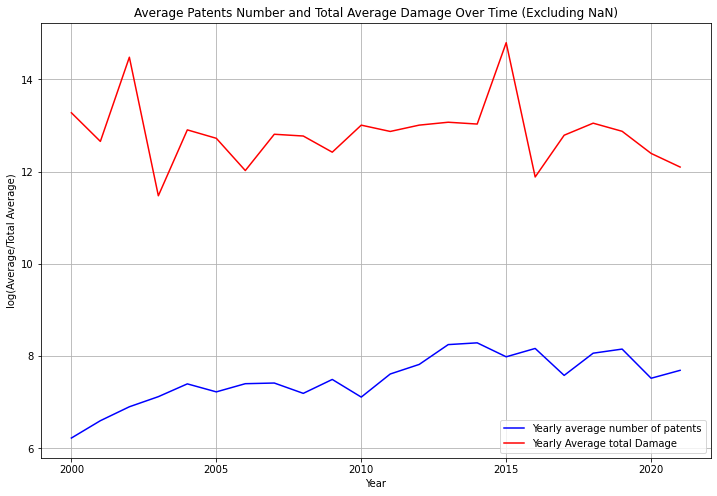

In [439]:
avg_patents_by_year = merged_nodup.groupby('Year')['patents_number'].mean().reset_index().dropna()
avg_affected_by_year = merged_nodup.groupby('Year')['Total Affected'].mean().reset_index().dropna()

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot line chart for average patents
plt.plot(avg_patents_by_year['Year'], np.log(avg_patents_by_year['patents_number']), linestyle='-', color='b', label='Yearly average number of patents')

# Plot line chart for average damage
plt.plot(avg_affected_by_year['Year'], np.log(avg_affected_by_year['Total Affected']), linestyle='-', color='r', label='Yearly Average total Damage')

plt.title('Average Patents Number and Total Average Damage Over Time (Excluding NaN)')
plt.xlabel('Year')
plt.ylabel('log(Average/Total Average)')
plt.legend()  # Add legend to differentiate between lines
plt.grid(True)  # Add grid for better readability
plt.show()

# Correlation analysis

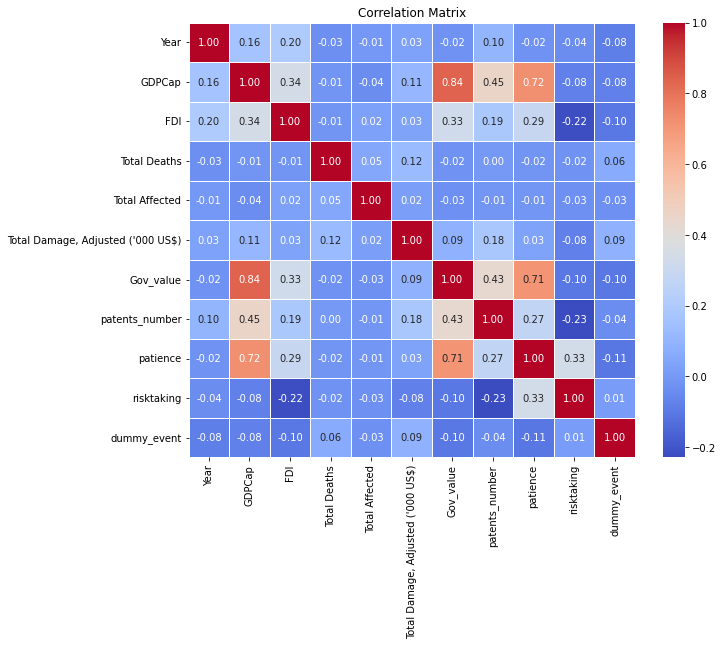

In [374]:
# numeric_columns = merged_final.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = merged_nodup.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [375]:
merged_nodup.skew().sort_values(ascending=False)

C:\Users\giamm\AppData\Local\Temp\ipykernel_24032\34471409.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_nodup.skew().sort_values(ascending=False)


Total Deaths                         39.816645
Total Affected                       37.488574
Total Damage, Adjusted ('000 US$)    26.102519
patents_number                        5.133707
GDPCap                                1.993860
FDI                                   1.497765
dummy_event                           1.291844
patience                              1.242947
Gov_value                             0.970958
risktaking                            0.899151
Year                                  0.096929
Worriness                            -0.618164
dtype: float64

In [376]:
merged_nodup['patents_number'].describe()

count     4288.000000
mean      1983.682894
std       7141.235824
min          0.000000
25%          7.737500
50%         33.833300
75%        655.450000
max      52256.481700
Name: patents_number, dtype: float64

In [377]:
# calculate threshold above which to cut observations at 3rd
threshold_pat = merged_nodup['patents_number'].mean() + 3 * merged_nodup['patents_number'].std()
sub_dataframe = merged_nodup[merged_nodup['patents_number'] < threshold_pat]


In [378]:
sub_dataframe.describe()

,Year,GDPCap,FDI,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Gov_value,patents_number,patience,risktaking,dummy_event
count,4169.000000,4030.000000,3.982000e+03,2971.000000,3.263000e+03,1.320000e+03,3839.000000,4169.000000,3424.000000,3424.000000,4169.000000
mean,2010.050372,11155.815136,1.429344e+10,197.231908,5.412793e+05,8.909590e+05,-0.058365,883.640470,-0.050309,-0.017679,0.229312
std,6.611429,15270.547260,2.221580e+10,3486.614819,8.059773e+06,3.797609e+06,0.881451,2613.752407,0.288557,0.284831,0.420440
min,2000.000000,351.839101,-2.421676e+11,1.000000,1.000000e+00,0.000000e+00,-1.502068,0.000000,-0.485428,-0.792435,0.000000
25%,2004.000000,1957.969814,1.408087e+09,4.000000,5.500000e+02,1.362900e+04,-0.614938,7.500000,-0.257255,-0.250597,0.000000
50%,2010.000000,4180.995462,5.705224e+09,11.000000,4.598000e+03,1.062235e+05,-0.358153,30.500000,-0.108733,-0.045175,0.000000
75%,2016.000000,12367.808384,2.024516e+10,33.000000,4.900550e+04,4.904778e+05,0.286161,511.638900,0.099113,0.154945,0.000000
max,2021.000000,133590.146976,2.370602e+11,165708.000000,3.300000e+08,8.118700e+07,2.434834,20158.819000,1.071452,0.970596,1.000000


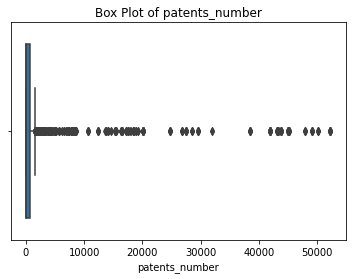

In [379]:
sns.boxplot(x=merged_nodup['patents_number'])
plt.title('Box Plot of patents_number')
plt.show()

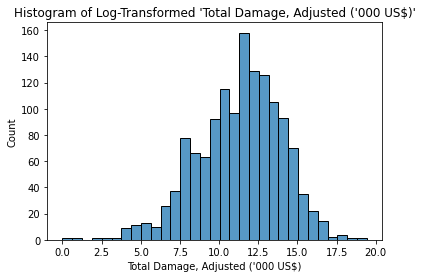

In [380]:
log_transformed_data = np.log1p(merged_nodup['Total Damage, Adjusted (\'000 US$)'])

sns.histplot(log_transformed_data, bins='auto', kde=False)
plt.title('Histogram of Log-Transformed \'Total Damage, Adjusted (\'000 US$)\'')
plt.show()

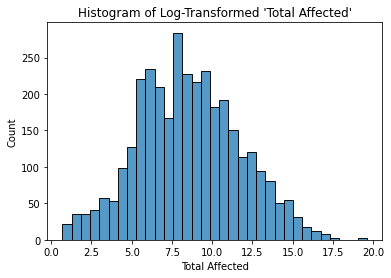

In [381]:
log_transformed_data = np.log1p(merged_nodup['Total Affected'])

sns.histplot(log_transformed_data, bins='auto', kde=False)
plt.title('Histogram of Log-Transformed \'Total Affected\'')
plt.show()

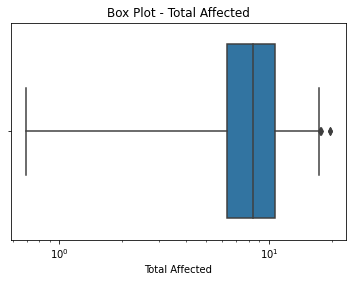

In [382]:
sns.boxplot(x=np.log1p(merged_nodup['Total Affected']))

# Set plot labels and title
plt.xlabel('Total Affected')
plt.xscale('log')
plt.title('Box Plot - Total Affected')

# Show the plot
plt.show()

In [383]:
len(merged_nodup['Country'].unique())

83

In [384]:
df_regress_affected = merged_nodup.dropna(subset=['Total Affected'])
df_regress_damage = merged_nodup.dropna(subset=['Total Damage, Adjusted (\'000 US$)'])

In [385]:
len(df_regress_affected['Country'].unique())

80

In [386]:
len(df_regress_damage['Country'].unique())

77

<AxesSubplot:xlabel='Total Affected', ylabel='patents_number'>

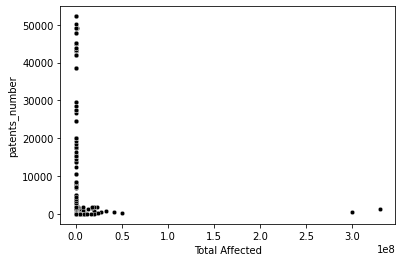

In [387]:
sns.scatterplot(x=(df_regress_damage['Total Affected']), y=(df_regress_damage['patents_number']), color = "black", s = 20)

<AxesSubplot:xlabel='Total Affected', ylabel='patents_number'>

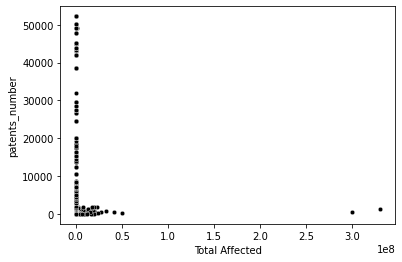

In [388]:
# sns.scatterplot(x='Total Damage, Adjusted (\'000 US$)', y='patents_number', data=merged_nodup, color = "black", s = 20)
sns.scatterplot(x=(df_regress_affected['Total Affected']), y=(df_regress_affected['patents_number']), color = "black", s = 20)

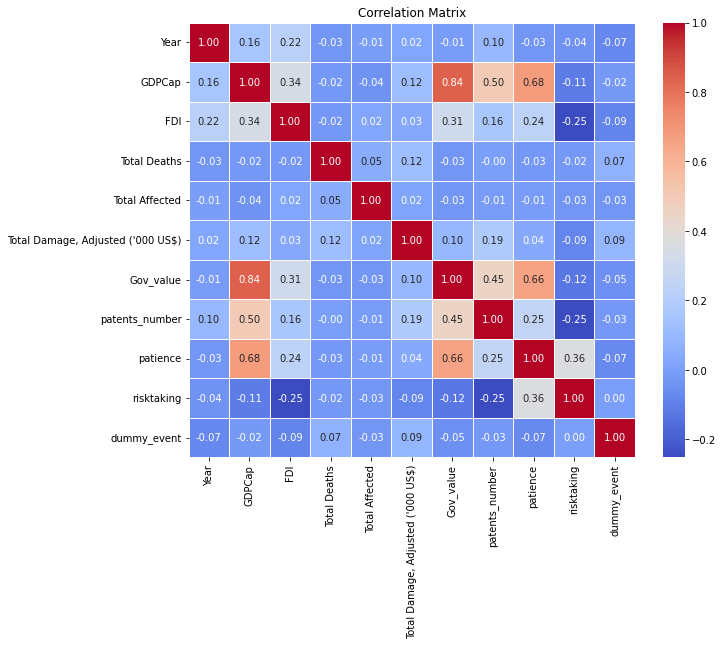

In [389]:
correlation_matrix = df_regress_affected.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [390]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from IPython.display import display

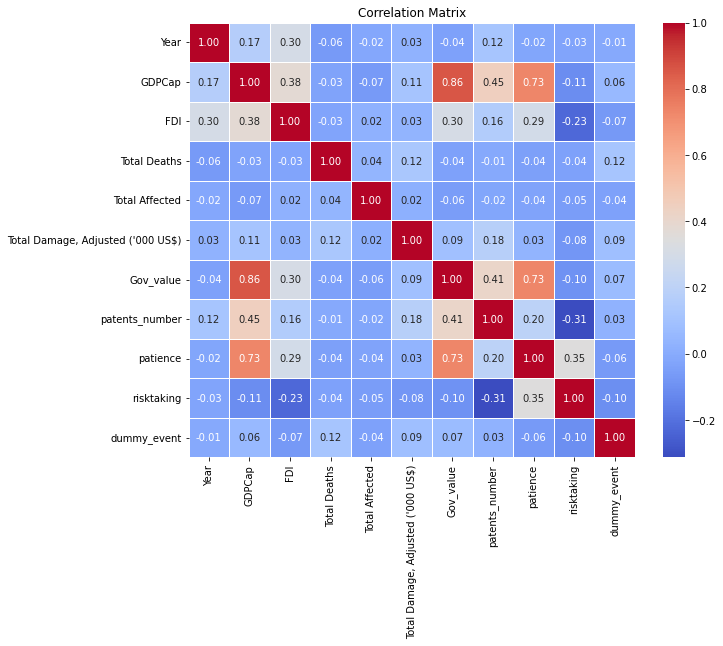

In [391]:
correlation_matrix = df_regress_damage.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [441]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = sm.add_constant(np.log1p(df_regress_affected['Total Affected'])) 
y = np.log1p(df_regress_affected['patents_number'])

model_robust = sm.RLM((y), (X)).fit()
print(model_robust.summary())


                    Robust linear Model Regression Results                    
Dep. Variable:         patents_number   No. Observations:                 3370
Model:                            RLM   Df Residuals:                     3368
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 12 Dec 2023                                         
Time:                        11:32:06                                         
No. Iterations:                    17                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.7820      0.136     35.

In [446]:
# regress on total damage
X = sm.add_constant((df_regress_damage['Total Damage, Adjusted (\'000 US$)'])) 
y = (df_regress_damage['patents_number'])

model_robust = sm.RLM((y), (X)).fit()
print(model_robust.summary())


                    Robust linear Model Regression Results                    
Dep. Variable:         patents_number   No. Observations:                 1382
Model:                            RLM   Df Residuals:                     1380
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 12 Dec 2023                                         
Time:                        11:34:01                                         
No. Iterations:                    50                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [394]:
merged_nodup

,Country,Year,GDPCap,FDI,Disaster Type,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Series Name,Gov_value,Worriness,patents_number,patience,risktaking,dummy_event
1,australia,2000,21853.449993,1.489298e+10,storm,1.0,200.0,152955.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137,0
6,australia,2000,21853.449993,1.489298e+10,storm,NaN,400.0,101970.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137,0
11,australia,2000,21853.449993,1.489298e+10,infestation,NaN,NaN,203941.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137,1
16,australia,2000,21853.449993,1.489298e+10,wildfire,NaN,200.0,NaN,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137,1
21,australia,2000,21853.449993,1.489298e+10,flood,NaN,600.0,450369.0,Control of Corruption,1.862088,72.991429,1511.8500,0.657004,0.137137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24391,zimbabwe,2018,2269.177012,7.178653e+08,epidemic,12.0,5164.0,NaN,Control of Corruption,-1.246001,NaN,0.0000,-0.238587,0.523195,1
24396,zimbabwe,2019,1421.868596,2.495000e+08,flood,26.0,NaN,NaN,Control of Corruption,-1.271190,NaN,0.0000,-0.238587,0.523195,0
24401,zimbabwe,2019,1421.868596,2.495000e+08,storm,628.0,270186.0,NaN,Control of Corruption,-1.271190,NaN,0.0000,-0.238587,0.523195,0
24411,zimbabwe,2021,1773.920411,2.500000e+08,storm,3.0,2400.0,NaN,Control of Corruption,-1.253550,NaN,0.3333,-0.238587,0.523195,0


In [395]:
floods = merged_nodup[merged_nodup['Disaster Type'] == 'flood']

c:\Users\giamm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='patents_number', ylabel='Total Affected'>

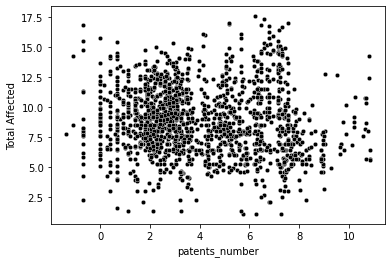

In [450]:
sns.scatterplot(x=np.log(floods['patents_number']), y=np.log(floods['Total Affected']), color = "black", s = 20)

In [397]:
droughts = merged_nodup[merged_nodup['Disaster Type'] == 'drought']

In [398]:
droughts.corr()

,Year,GDPCap,FDI,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Gov_value,patents_number,patience,risktaking,dummy_event
Year,1.000000,0.235118,0.180719,-0.042982,-0.061882,0.267147,-0.071323,0.085200,0.095844,0.236814,NaN
GDPCap,0.235118,1.000000,0.287568,-0.395605,-0.133990,0.265224,0.752795,0.623266,0.600886,-0.097688,NaN
FDI,0.180719,0.287568,1.000000,-0.395695,0.172817,0.632739,0.216678,0.405921,0.089684,-0.266180,NaN
Total Deaths,-0.042982,-0.395605,-0.395695,1.000000,-0.209770,-1.000000,-0.390196,-0.207379,0.392790,0.229185,NaN
Total Affected,-0.061882,-0.133990,0.172817,-0.209770,1.000000,0.474929,0.024463,0.486123,0.089449,-0.226830,NaN
"Total Damage, Adjusted ('000 US$)",0.267147,0.265224,0.632739,-1.000000,0.474929,1.000000,0.176784,0.437719,0.036240,-0.253348,NaN
Gov_value,-0.071323,0.752795,0.216678,-0.390196,0.024463,0.176784,1.000000,0.399634,0.537473,-0.163570,NaN
patents_number,0.085200,0.623266,0.405921,-0.207379,0.486123,0.437719,0.399634,1.000000,0.546162,-0.120442,NaN
patience,0.095844,0.600886,0.089684,0.392790,0.089449,0.036240,0.537473,0.546162,1.000000,0.384436,NaN
risktaking,0.236814,-0.097688,-0.266180,0.229185,-0.226830,-0.253348,-0.163570,-0.120442,0.384436,1.000000,NaN


<AxesSubplot:xlabel='Total Affected', ylabel='patents_number'>

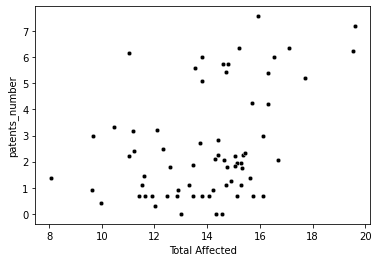

In [451]:
sns.scatterplot(x=np.log1p(droughts['Total Affected']), y=np.log1p(droughts['patents_number']), color = "black", s = 20)

In [400]:
merged_gdp_below = merged_nodup[merged_nodup['GDPCap'] < merged_nodup['GDPCap'].mean()]

In [401]:
merged_gdp_below['Country'].unique()

array(['czechia', 'hungary', 'mexico', 'poland', 'portugal', 'algeria',
       'argentina', 'armenia', 'belarus', 'bosnia and herzegovina',
       'brazil', 'bulgaria', 'chile', 'colombia', 'costa rica', 'croatia',
       'cuba', 'ecuador', 'el salvador', 'estonia', 'georgia',
       'guatemala', 'india', 'indonesia', 'jamaica', 'jordan',
       'kazakhstan', 'kenya', 'latvia', 'lebanon', 'lithuania',
       'north macedonia', 'malaysia', 'mongolia', 'morocco', 'nigeria',
       'pakistan', 'panama', 'peru', 'philippines', 'romania',
       'saudi arabia', 'seychelles', 'south africa', 'sri lanka',
       'thailand', 'trinidad and tobago', 'tunisia', 'ukraine', 'uruguay',
       'uzbekistan', 'zimbabwe'], dtype=object)

In [402]:
merged_gdp_below.corr()

,Year,GDPCap,FDI,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Gov_value,patents_number,patience,risktaking,dummy_event
Year,1.000000,0.322497,0.358239,-0.031724,-0.008824,0.054756,-0.071752,0.200919,-0.026627,-0.048781,-0.085337
GDPCap,0.322497,1.000000,0.261123,-0.041577,-0.049863,0.012942,0.446594,-0.136519,-0.127655,-0.039839,-0.127417
FDI,0.358239,0.261123,1.000000,-0.020531,0.046383,0.122046,0.141299,0.706896,-0.112351,-0.425443,-0.096932
Total Deaths,-0.031724,-0.041577,-0.020531,1.000000,0.044978,0.159042,-0.035045,-0.007800,-0.023179,-0.023360,0.068363
Total Affected,-0.008824,-0.049863,0.046383,0.044978,1.000000,0.097688,0.000221,0.090459,0.024968,-0.035957,-0.034713
"Total Damage, Adjusted ('000 US$)",0.054756,0.012942,0.122046,0.159042,0.097688,1.000000,0.002395,0.147640,-0.040485,-0.103412,0.002614
Gov_value,-0.071752,0.446594,0.141299,-0.035045,0.000221,0.002395,1.000000,0.135495,-0.021312,-0.092358,-0.162656
patents_number,0.200919,-0.136519,0.706896,-0.007800,0.090459,0.147640,0.135495,1.000000,0.105467,-0.305302,-0.106042
patience,-0.026627,-0.127655,-0.112351,-0.023179,0.024968,-0.040485,-0.021312,0.105467,1.000000,0.620197,-0.120261
risktaking,-0.048781,-0.039839,-0.425443,-0.023360,-0.035957,-0.103412,-0.092358,-0.305302,0.620197,1.000000,0.010302


In [403]:
merged_gdp_above= merged_nodup[merged_nodup['GDPCap'] >= merged_nodup['GDPCap'].mean()]

In [404]:
merged_gdp_above['Country'].unique()

array(['australia', 'austria', 'belgium', 'canada', 'czechia', 'denmark',
       'finland', 'france', 'germany', 'greece', 'hungary', 'iceland',
       'ireland', 'italy', 'japan', 'luxembourg', 'new zealand', 'norway',
       'poland', 'portugal', 'spain', 'sweden', 'switzerland',
       'argentina', 'bermuda', 'brazil', 'bulgaria', 'cayman islands',
       'chile', 'costa rica', 'croatia', 'cyprus', 'estonia', 'israel',
       'kazakhstan', 'kuwait', 'latvia', 'lithuania', 'panama',
       'puerto rico', 'romania', 'saudi arabia', 'seychelles',
       'singapore', 'slovenia', 'trinidad and tobago',
       'united arab emirates', 'uruguay'], dtype=object)

In [261]:
merged_gdp_above.corr()

,Year,GDPCap,FDI,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Gov_value,patents_number,patience,risktaking,dummy_event
Year,1.000000,0.187890,0.024255,-0.077188,0.020914,0.022861,-0.222933,0.123800,-0.149814,0.016093,-0.060324
GDPCap,0.187890,1.000000,0.152163,-0.000068,-0.064549,0.046665,0.609509,0.233581,0.649001,0.092313,-0.055024
FDI,0.024255,0.152163,1.000000,0.003888,0.089696,-0.014658,0.158506,0.060821,0.241562,0.095613,-0.103644
Total Deaths,-0.077188,-0.000068,0.003888,1.000000,0.099582,0.479289,0.022800,0.021360,0.003425,-0.024379,0.009446
Total Affected,0.020914,-0.064549,0.089696,0.099582,1.000000,0.047508,-0.086808,-0.017701,-0.071562,-0.031006,-0.016350
"Total Damage, Adjusted ('000 US$)",0.022861,0.046665,-0.014658,0.479289,0.047508,1.000000,0.010937,0.154361,-0.040664,-0.095971,0.122020
Gov_value,-0.222933,0.609509,0.158506,0.022800,-0.086808,0.010937,1.000000,0.243747,0.782888,0.101482,0.009596
patents_number,0.123800,0.233581,0.060821,0.021360,-0.017701,0.154361,0.243747,1.000000,-0.020310,-0.432213,-0.024435
patience,-0.149814,0.649001,0.241562,0.003425,-0.071562,-0.040664,0.782888,-0.020310,1.000000,0.517029,-0.083049
risktaking,0.016093,0.092313,0.095613,-0.024379,-0.031006,-0.095971,0.101482,-0.432213,0.517029,1.000000,-0.029343


In [406]:
merged_damage_above = df_regress_damage[df_regress_damage['Total Damage, Adjusted (\'000 US$)'] >= df_regress_damage['Total Damage, Adjusted (\'000 US$)'].mean()]
merged_damage_below = df_regress_damage[df_regress_damage['Total Damage, Adjusted (\'000 US$)'] < df_regress_damage['Total Damage, Adjusted (\'000 US$)'].mean()]

In [407]:
merged_damage_above['Country'].unique()

array(['australia', 'austria', 'belgium', 'canada', 'czechia', 'denmark',
       'france', 'germany', 'greece', 'italy', 'japan', 'mexico',
       'new zealand', 'poland', 'portugal', 'spain', 'sweden',
       'switzerland', 'türkiye', 'algeria', 'argentina', 'brazil',
       'cayman islands', 'chile', 'colombia', 'croatia', 'cuba',
       "democratic people's republic of korea", 'ecuador', 'el salvador',
       'guatemala', 'india', 'indonesia', 'malaysia', 'pakistan', 'peru',
       'philippines', 'puerto rico', 'romania', 'saudi arabia',
       'south africa', 'sri lanka', 'thailand', 'ukraine'], dtype=object)

In [410]:
merged_damage_below['Country'].unique()

array(['australia', 'austria', 'belgium', 'canada', 'czechia', 'denmark',
       'france', 'germany', 'greece', 'hungary', 'iceland', 'ireland',
       'italy', 'japan', 'luxembourg', 'mexico', 'new zealand', 'norway',
       'poland', 'portugal', 'spain', 'sweden', 'switzerland', 'türkiye',
       'algeria', 'argentina', 'armenia', 'belarus', 'bermuda',
       'bosnia and herzegovina', 'brazil', 'bulgaria', 'cayman islands',
       'chile', 'colombia', 'costa rica', 'croatia', 'cuba', 'cyprus',
       "democratic people's republic of korea", 'ecuador', 'egypt',
       'el salvador', 'estonia', 'georgia', 'guatemala', 'india',
       'indonesia', 'israel', 'jamaica', 'kazakhstan', 'kenya', 'latvia',
       'lithuania', 'north macedonia', 'malaysia', 'mongolia', 'morocco',
       'nigeria', 'pakistan', 'panama', 'peru', 'philippines',
       'puerto rico', 'romania', 'saudi arabia', 'seychelles', 'slovenia',
       'south africa', 'sri lanka', 'thailand', 'trinidad and tobago',
       '

In [411]:
merged_damage_below.corr()

,Year,GDPCap,FDI,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Gov_value,patents_number,patience,risktaking,dummy_event
Year,1.000000,0.164510,0.278674,-0.081653,-0.075635,0.031735,-0.054311,0.095829,-0.045779,-0.036107,-0.002067
GDPCap,0.164510,1.000000,0.372056,-0.161876,-0.127057,0.221720,0.845987,0.436969,0.700520,-0.130655,0.072913
FDI,0.278674,0.372056,1.000000,-0.081581,-0.054675,0.185451,0.286697,0.145592,0.251014,-0.255541,-0.042827
Total Deaths,-0.081653,-0.161876,-0.081581,1.000000,0.293367,0.140351,-0.150927,-0.065944,-0.063985,0.015293,0.031940
Total Affected,-0.075635,-0.127057,-0.054675,0.293367,1.000000,0.163223,-0.109952,-0.051578,-0.048301,-0.029987,-0.076014
"Total Damage, Adjusted ('000 US$)",0.031735,0.221720,0.185451,0.140351,0.163223,1.000000,0.181266,0.110516,0.118029,-0.149946,0.025383
Gov_value,-0.054311,0.845987,0.286697,-0.150927,-0.109952,0.181266,1.000000,0.400707,0.702554,-0.102023,0.076576
patents_number,0.095829,0.436969,0.145592,-0.065944,-0.051578,0.110516,0.400707,1.000000,0.197229,-0.291522,0.018888
patience,-0.045779,0.700520,0.251014,-0.063985,-0.048301,0.118029,0.702554,0.197229,1.000000,0.356103,-0.044142
risktaking,-0.036107,-0.130655,-0.255541,0.015293,-0.029987,-0.149946,-0.102023,-0.291522,0.356103,1.000000,-0.098288


In [427]:
merged_gdp_above[['patents_number','Total Affected','Total Damage, Adjusted (\'000 US$)']].corr()[:1]

,patents_number,Total Affected,"Total Damage, Adjusted ('000 US$)"
patents_number,1.0,-0.017701,0.154361


In [429]:
merged_gdp_below[['patents_number','Total Affected','Total Damage, Adjusted (\'000 US$)']].corr()[:1]

,patents_number,Total Affected,"Total Damage, Adjusted ('000 US$)"
patents_number,1.0,0.090459,0.14764


In [462]:
# check regression on merged_gdp_below
l = merged_gdp_below[merged_gdp_below['Total Affected'].notna()]
X = sm.add_constant(np.log1p(l['Total Affected'])) 
y = np.log1p(l['patents_number'])

model_robust = sm.OLS((y), (X)).fit()
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:         patents_number   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     30.31
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           4.07e-08
Time:                        11:43:38   Log-Likelihood:                -5247.1
No. Observations:                2490   AIC:                         1.050e+04
Df Residuals:                    2488   BIC:                         1.051e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4615      0.121     20.

In [464]:
# check regression on merged_gdp_below
n = merged_gdp_above[merged_gdp_above['Total Affected'].notna()]
X = sm.add_constant(np.log1p(n['Total Affected'])) 
y = np.log1p(n['patents_number'])

model_robust = sm.OLS((y), (X)).fit()
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:         patents_number   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.005198
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.943
Time:                        11:44:39   Log-Likelihood:                -1749.9
No. Observations:                 768   AIC:                             3504.
Df Residuals:                     766   BIC:                             3513.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.1127      0.241     29.

# Merging cleaning Cata and Patent

In [ ]:
# #Group the columns with catasrophy sample and keep all as columns

# Catagrouped_above = cata_above_mediane.groupby(['Country', 'Disaster Type', 'Year']).agg({
#     "Total Damage, Adjusted ('000 US$)": 'sum',
#     'Total Deaths': 'sum'
# }).reset_index()

# #Seconde group to count the number of lines per group
# count_per_group = cata_above_mediane.groupby(['Country', 'Disaster Type', 'Year']).size().reset_index(name='Count')

# #Merge both results
# Catagrouped_above = Catagrouped_above.merge(count_per_group, on=['Country', 'Disaster Type', 'Year'])

# Catagrouped_above.head(60)

In [ ]:
# #NOT USEFULL ANYMORE : create speparate dataframe for each catastrophy
# drought_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'drought'].copy()
# storm_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'storm'].copy()
# flood_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'flood'].copy()
# earthquake_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'earthquake'].copy()
# Volcanic_activity_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'Volcanic activity'].copy()
# print(flood_above)

In [ ]:
# #check new dataframe are ok
# nombre_drought = Catagrouped_above['Disaster Type'].value_counts()['flood']
# print(nombre_drought)

In [ ]:
# #Prepare dataframe to merge
# pat20.loc[:, 'Country'] = pat20['Country'].astype('object')

In [ ]:
# flood_above.dtypes
# pat20.dtypes

In [ ]:
# #Prepare dataframe to merge change row name to merge regarding country and years
# pat20.rename(columns=lambda x: x.strip() if x == 'Time ' else x, inplace=True)

# pat20.rename(columns={'Time': 'Year'}, inplace=True)
# #pat20.rename(columns={'Time ': 'Start Year'}, inplace=True)

In [ ]:
# #change the order to merge
# new_order = ['Country', 'Year', 'patents_number']
# pat20 = pat20.reindex(columns=new_order)

#Merging Cata, Patent and GDP

In [ ]:
# pat20.dtypes

In [ ]:
# #create one big dataset with catastrophy (considered as above average therefore severe), patent, and GDP
# dataset_1 =pd.merge(Catagrouped_above, pat20, on=['Country', 'Year'], how='left')
# dataset = pd.merge(dataset_1,gdp, on=['Country', 'Year'], how='left')
# dataset.head(100)

In [ ]:
# #Check if ok
# dataset['patents_number'].count()

In [ ]:
# #drop 'NaN' in patent_number
# ds = dataset.dropna(subset=['patents_number'])
# ds.head(20)

In [ ]:
# ds['Country'].unique()

In [ ]:
# #check what is inside
# ds['Country'].unique()
# ds['Year'].unique()
# ds['Country'].count()

#EDA

In [ ]:
# #check correlation between columns
# corr_ds = ds.corr()

# display(corr_ds)

In [ ]:
# #cut Above and under the mediane GDP regarding 2010 as a baseline to cut --> come frome subpart GDP initial dataset

# below = gdp_below
# ds_below = ds[ds['Country'].isin(below)]

# above = gdp_above
# ds_above = ds[ds['Country'].isin(above)]

# ds_below.head(20)
# ds_above.head(20)

In [ ]:
# ds_below['Country'].count()

In [ ]:
# #check corr above and below to spot if differences
# corr_ds_below = ds_below.corr()
# corr_ds_above = ds_above.corr()

# display(corr_ds_below)
# print()
# display(corr_ds_above)

In [ ]:
# #check only for flood difference above and under --> human related
# flood_below = ds_below[ds_below['Disaster Type'] == 'flood']
# flood_above = ds_above[ds_above['Disaster Type'] == 'flood']

# corr_flood_below = flood_below.corr()
# corr_flood_above = flood_above.corr()

# display(corr_flood_below)
# print()
# display(corr_flood_above)

In [ ]:
# #check if significative to use Normal > 30 obs
# flood_below['Country'].count()
# #flood_above['Country'].count()

In [ ]:
# #check only for earthquake difference above and under --> non human related
# earthquake_below = ds_below[ds_below['Disaster Type'] == 'earthquake']
# earthquake_above = ds_above[ds_above['Disaster Type'] == 'earthquake']

# corr_earthquake_below = earthquake_below.corr()
# corr_earthquake_above = earthquake_above.corr()

# display(corr_earthquake_below)
# print()
# display(corr_earthquake_above)

In [ ]:
# #check if significative to use Normal > 30 obs --> not enough to be significative !!!
# earthquake_below['Country'].count()
# earthquake_above['Country'].count()

In [ ]:
# #check based on all human related cata
# human_below = ds_below[(ds_below['Disaster Type'] != "earthquake") & (ds_below['Disaster Type'] != "volcanic activity")]

# human_above = ds_above[(ds_above['Disaster Type'] != "earthquake") & (ds_above['Disaster Type'] != "volcanic activity")]


# corr_human_below = human_below.corr()
# corr_human_above = human_above.corr()

# display(corr_human_below)
# print()
# display(corr_human_above)
